# Problem Set 2 

**Data Manipulation**

CHEM 114

Shimon Weiss

**Due Monday, Aril 12th**

---

This PS is designed to have you practice the basics of Python data manipulation. 
We will try to walk you through most of the assignment, but you will have to enter and execute your own code.

By the end of this assignment you should be able to manipulate and probe datasets that you upload with Python.

## Initialize your code

- Here, import the dependancies you will need to begin your analysis. 
> In computer programming, this is called the 'boilerplate'.
  The boilerplate is a section of code that must be included with little or no alteration.
  It is often used when referring to languages that are considered verbose,
  i.e. the programmer must write a lot of code to do minimal jobs. 
  Python is considered a verbose language. 
  In this case, our boilerplate is composed of the libraries that we import.

- If you are confused as to what to put in this section, look at other example code we have provided.
  Remember, `SHIFT+ENTER` to execute the code in a cell!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

---

## Problem 1

**Loading data**

- Use the numpy `loadtxt` function to load the data file, "ProvidedData.csv".
  This will load your data from a .csv into a numpy array. 
  When you load your data this way, you will need to specify the type of delimiter. 
  
> HINT: csv stands for **c**omma **s**eparated **v**alue. 
Knowing this, can you guess the delimiter?
> If you can't remember how this is done, refer to the example done in class.

- Remember to give loaded data a name e.g. `ProvidedData` or `provided_data`.

- Preview your data so that you know it is loaded properly.
    Note that jupyter notebook will always print the last thing written 
    in a cell when executed with `SHIFT + ENTER`. 
    This is a very useful debugging technique.
    You can also use the builtin `print()` function.

- Check how many rows and column there are by finding the shape of your array, `provided_data`.
  Checking the shape and/or length of an array is often an important debugging step!

- use `len()` to check the length of your array.
---

Now that you have loaded the data, it is easier to manipulate 
the data if you reassign the data into X-variables, Y-variables, Z-varibles, etc.

---

## Problem 2

**Indexing your data**

- From your loaded data, split the six columns into six separate 1D arrays.
  Be sure to use different array names so that you don't overwrite 
  the original data
  - remember that indexing begins at 0 in Python!
> A note on nameing, don't worry about being creative, 
    a **descriptive** name is better.
    For example:  
>    - `random_dist1`
>    - `random_dist2`
>    - `random_dist3`
>    - `random_dist4`
>    - `provided_x`
>    - `provided_y`


---

## Problem 3

**Calculating statistics**

- Now that the data is in a format that is easily manipulated, 
    calculate the min, max, and standard deviation for `random_dist1`
- print each value clearly using 
    [f-strings](https://docs.python.org/3/tutorial/inputoutput.html).
    Round appropriately.
- calculate the variance as an operation within the curly bracket of 
    your f-string

An example for the mean is shown below using an example array called `example_data`:

In [12]:
example_data = np.arange(1, 17).reshape(4,4)
example_data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [13]:
# calculate the mean for the indexed array using the .mean() method in numpy
mean = example_data[0,:].mean()
mean

2.5

Here, the output is 2.5, but it is not obvious what the number 
2.5 corresponds to without writing it explicitly.

In this case, it is useful to use the `print()` function so that the output is given a meaning and is *easy to read*.
For example:

In [14]:
print('Mean =', mean)

Mean = 2.5


Another (better) way to print is with f-strings. 
In this case the variable is replaced inside the string at the location of the curly brackets, `{}`. 

Implement the f-string by adding the letter 'f' to the begining of the string:

In [15]:
print(f'Mean = {mean}')

Mean = 2.5


Note that we can manipulate the value in the curly brackets.
For example we can change the number of decimal places:

In [16]:
print(f'Mean = {mean: .2f}')

Mean =  2.50


We can also perform an operation:

In [17]:
print(f'squared mean = {mean ** 2}')

squared mean = 6.25


---

## Plotting data

Let's now try to get a little more information about the 
provided data by plotting the distribution with a histogram.

First, let's generate some random, normally distributed, 
data and plot a histogram:

In [22]:
hist_data = np.random.randn(200)
hist_data.shape

(200,)

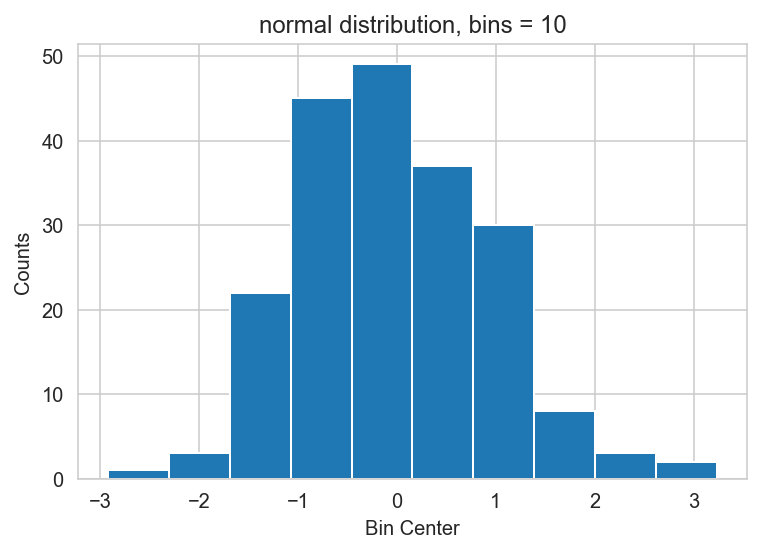

In [23]:
bins = 10
plt.hist(hist_data, bins=bins)

plt.title(f'normal distribution, bins = {bins}')
plt.xlabel('Bin Center')
plt.ylabel('Counts');

---
## Problem 4

**Affect of bin size**

Explore your histogram by trying different bin numbers. 

- Make at least three plots of your data and specify the number of bins 
    (`bins=10` is the default value).
  For example try `bins=100`, `bins=20`, `bins=5` etc. 
    - always label your axes including units if applicable
    - be sure to title your graph with a description of the data
- on your last plot, plot a line at the mean of the distribution
    using `plt.axvline(your_mean, color='k', linestyle='--')`
- similarly, plot the median (choose a different color so that it is visible)
    > HINT: use `np.median()`
    
- In 2 sentances or less answer the following
    - How does the number of bins affect the noise of your distribution? 
    - Similarly, how does the number of bins affect the resolution of your histogram? 
        In other words, do you gain or loose information with increasing bin number?

---
## Problem 5 

**Identify distributions**

- Create a histogram for each of the first four columns of the provided data
    - always include axes labels!!!
- plot a vertical line at the center of the distribution and use `label` to print
    the mean
    - remember to add `plt.legend()` so that the label appears on the graph
    - see an example in the Fitting with `curve_fit` section of this notebook
- In the title of each plot identify 
    - the type of random distribution 
    - the standard deviation
    
> Refer to page 32 in your textbook if you need help identifying the distributions.

---

## Fitting with `curve_fit`

The following is an example of fitting using the `curve_fit`
function from the `scipy` module.

In [32]:
# define some x data
example_x = example_data[0,:]
example_x

array([1, 2, 3, 4])

In [33]:
# define some y data
example_y = example_data[:,0]**2
example_y

array([  1,  25,  81, 169])

After defining our data, the first thing to do is to plot it
so that we can see how it bahaves in order to choose a fit function.

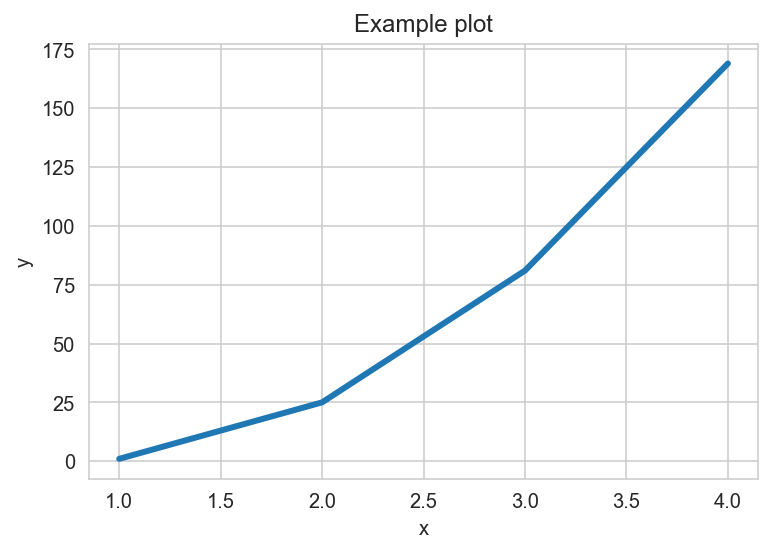

In [34]:
plt.plot(example_x, example_y, linewidth = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example plot');

Now we will fit the data by defining a function.

In the above case, we will define a function with parameters `a` and `b`, 
of the form $Y=X^a+b$ that we will use to fit our data. 

In [35]:
def fit_func(x, a=1, b=1):
    return x**a + b

> Note that syntax matters here. 
The colon is required, as well as the indent for `return`. 
Any deviations from the accepted syntax will give errors.
> the function should take all necessary parameters i.e. `fit_func(x, a, b)`, 
and you can also choose to pass default values. 
For example, `a=1` and `b=1` when you create the function.

The line below will use the function wedeinfed above, called `fit_func`, to fit our example data. 
It returns a [tuple](https://www.w3schools.com/python/python_tuples.asp)
of arrays, where the first array, `example_results`, contains the optimized parameters `a` and `b`.   
Note that we will not be using the covariance matrix in this problem set. 

In [36]:
example_results, cov = curve_fit(fit_func, example_x, example_y)
example_results, cov

(array([ 3.66882804, 11.05803497]),
 array([[ 5.00134926e-03, -3.68725585e-01],
        [-3.68725585e-01,  6.77501653e+01]]))

Now that we have the best fit parameters `a` and `b` for the equation $Y = X^a+b$ 
we can create the best fit line.

First we need to define the range for x. 
In this case we us `np.linespace()` to get 50 evenly spaced x-Values from 1.0 to 4.0
> numpy uses the convention (start, stop, number of steps)

In [37]:
example_xfit = np.linspace(1.0, 4.0, 50)
example_xfit

array([1.        , 1.06122449, 1.12244898, 1.18367347, 1.24489796,
       1.30612245, 1.36734694, 1.42857143, 1.48979592, 1.55102041,
       1.6122449 , 1.67346939, 1.73469388, 1.79591837, 1.85714286,
       1.91836735, 1.97959184, 2.04081633, 2.10204082, 2.16326531,
       2.2244898 , 2.28571429, 2.34693878, 2.40816327, 2.46938776,
       2.53061224, 2.59183673, 2.65306122, 2.71428571, 2.7755102 ,
       2.83673469, 2.89795918, 2.95918367, 3.02040816, 3.08163265,
       3.14285714, 3.20408163, 3.26530612, 3.32653061, 3.3877551 ,
       3.44897959, 3.51020408, 3.57142857, 3.63265306, 3.69387755,
       3.75510204, 3.81632653, 3.87755102, 3.93877551, 4.        ])

Now generate the y-values for your fit by passing the `x` array to `fit_func`.

In [38]:
example_yfit = fit_func(example_xfit, *example_results)
example_yfit

array([ 12.05803497,  12.30163983,  12.58578627,  12.91445095,
        13.29175834,  13.72197818,  14.20952304,  14.75894608,
        15.37493891,  16.06232963,  16.8260809 ,  17.6712882 ,
        18.60317811,  19.62710671,  20.74855803,  21.97314263,
        23.30659614,  24.754778  ,  26.32367009,  28.01937559,
        29.84811772,  31.81623867,  33.93019844,  36.19657385,
        38.62205746,  41.21345664,  43.97769259,  46.92179942,
        50.05292328,  53.37832146,  56.90536159,  60.64152082,
        64.59438501,  68.77164798,  73.18111078,  77.83068094,
        82.72837175,  87.88230163,  93.30069341,  98.99187371,
       104.96427225, 111.22642131, 117.78695506, 124.65460898,
       131.83821931, 139.34672244, 147.18915439, 155.37465027,
       163.91244374, 172.81186647])

In the previous cell, we calculated the fit for each element in the 
array `x_fit` and passed `*results` which contains the optimized `a` and `b` parameters.

> Note: the `*` is a special Python syntax that unwraps the elements of the object. 
  Without it you would need to specify the elements in `results` by slicing, e.g.
  `results[0]` and `results[1]`


Now, plot your data and print the values for `a` and `b`.

Variable a =  3.67
Variable b =  11.06


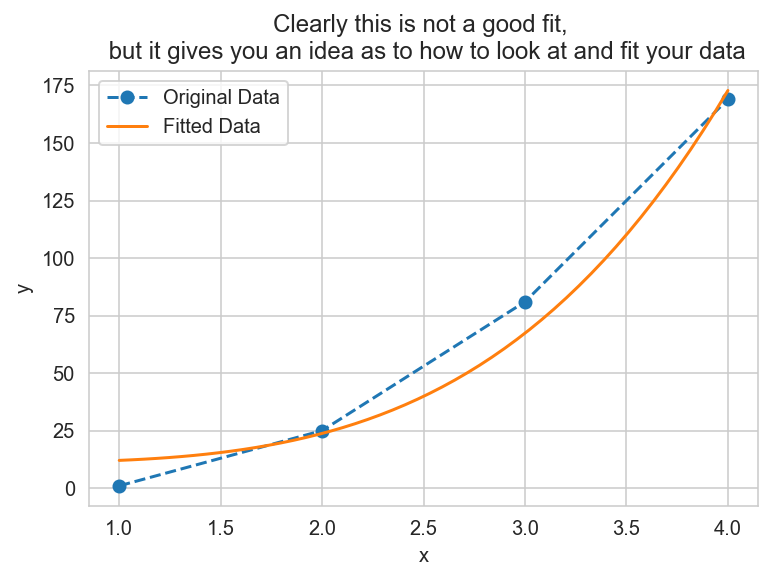

In [39]:
plt.plot(example_x, example_y, '--o', label='Original Data') # plot raw data
plt.plot(example_xfit, example_yfit,  label='Fitted Data') # plot fit data
plt.title('Clearly this is not a good fit, \n but it gives you an idea as to how to look at and fit your data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() #this prints the legend on the graph with the labels you specified in the `plt.plot` function

print(f'Variable a = {example_results[0]: .2f}')
print(f'Variable b = {example_results[1]: .2f}')

## Fitting with `lmfit`

LMFit provides a high-level interface to non-linear optimization 
and curve fitting problems for Python. 
It builds on and extends many of the optimization methods of `scipy.optimize`. 
Initially inspired by (and named for) extending the Levenberg-Marquardt 
method from `scipy.optimize.leastsq`, `lmfit` now provides a number of useful 
enhancements to optimization and data fitting problems.

One useful enhancement is the parameter and results classes.
We will now perform the same example fit using `lmfit` to demonstrate the
difference. 

See the `lmfit` [documentation](http://cars9.uchicago.edu/software/python/lmfit/model.html) 
for help using this package.

In [40]:
import lmfit
print('lmfit version:', lmfit.__version__) #it is good to know exactly what version of a package you are using

lmfit version: 1.0.2


In [41]:
# define the model
example_model = lmfit.Model(fit_func)

`lmfit.Model` uses default values as initial values for fitting.
Parameters can have constraints (i.e. boundaries: `min` and/or `max`),
for example,

In [42]:
example_model.set_param_hint('sigma', min=0)

In [43]:
# perform fit
example_params = example_model.make_params()
# print parameters' initial values and constraints
example_params

name,value,initial value,min,max,vary
a,1.00000000,None,-inf,inf,True
b,1.00000000,None,-inf,inf,True
sigma,-inf,None,0.00000000,inf,True


Now, we can fit the model to the data,

In [44]:
# perform the fit
example_results = example_model.fit(example_y, x=example_x)
# print statistics and  parameters' optimized fit values and constraints
example_results

> **NOTE** You can optionally pass initial values for the fitted parameters 
> (e.g. `model.fit(y, x=x, mean=2)`). 
When no inital values are speciefied
> they are taken from the defaults values in the function definition (e.g. `fit_func`).

Results can be accessed from `example_results`.
For example,

In [45]:
example_results.chisqr

324.5263269344105

The `lmfit` object `example_results` supports plotting,
and will generate a plot of the data and fit as well as the residuals.

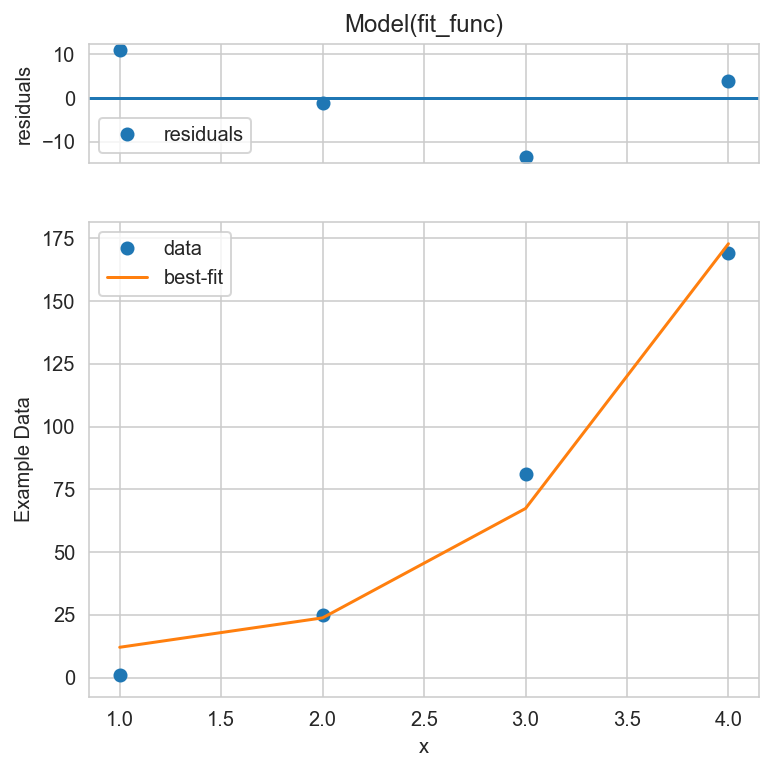

In [46]:
fig = example_results.plot()
plt.ylabel('Example Data');

> **Note for advanced users**
>
>In the command above, we used `example_results.plot`, meaning that the function `plot` comes from
>the results. These kinds of functions contained in an object (and doing some
>operation on the object) are called 'methods.' In other words, `results` has a plot method
>so it knows how to plot itself.


---
##  Problem 6
- what sort of fitting does the `curve_fit` function perform?
    Explain in 2 sentences or less. 
- plot the data provided in column 5 (x) and column 6 (y)
> Hint: what function does your data resemble? 
    You will need to figure this out in order to fit properly
- define a fit function
- use the `curve_fit` function from the `scipy` module to fit the data
- print the optimized values for parameters `a`, `b`, and `c`
    - Check the contents of `curve_fit` by printing the output 
    - use a reasonable number of decimal places

---
## Problem 7

Let's perform the same fit, but this time, we will use the 
`lmfit` package

- use `lmfit` to fit the data from Problem 6
    - use the example from the Fitting with lmfit section of this notebook
    - note that the fitting operation results in NaN (not a number) values, so
        you will need to pass `nan_policy='propagate'` to the `model.fit()` function
- print the optimized parameters 
- plot the data and fit along with the residuals plot
- make another plot, this time using `matplotlib` to plot the data and best-fit using `results.best_fit`
- Veryify that your data is exponential by creating a third plot on
    the [semilog scale](https://en.wikipedia.org/wiki/Semi-log_plot)
    using `np.log()` for the natural log.
    - Hint: plot the log of column 6 with respect to column 5.

---

## Fitting real data

In this final question, you will load and perfome a fit of real 
single-molecule spectroscopy data from the Shimon Weiss lab. 

> This experimental dataset has been acquired by **Yazan Alhadid** (yalhadid@ucla.edu).
> For more information on the science behind this kind of measurement see:
> - A Novel Initiation Pathway in Escherichia Coli Transcription, (2016), Lerner/Chung et al. 
> doi:[10.1101/042432](http://dx.doi.org/10.1101/042432) 

The dataset below contains two experimental kinetic curves representing 
DNA transcription by RNA polymerase
starting from two different initial states ITC2 and ITC7 
(meaning that the RNAP has transcribed
2 or 7 ribonucleotides respectively). 
It is interesting to note that the kinetics of the ITC7 
complex are slower than for the ITC2 complex.

Each number in the table is the result of a smFRET measurement and represents 
a transcription efficiency, $E$, measured after a certain amount of time.
Note that, for some time points the measurement has been performed only in
one configuration (either ITC2 or ITC7) so there are missing data points (NaN, i.e. not-a-number).

When fitting this dataset we need to make sure we correctly handle the NaN elements.

### Data format

The data has been saved in CSV (comma separated values) in Excel. 
We will load this data in a pandas DataFrame, a special python object
to hold tabular data. See the documentation for [pandas](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html) to get started, 
and also checkout [this paper](https://vita.had.co.nz/papers/tidy-data.pdf), 
for a short and well-written explaination of the Tidy-Data concept.

#### Difference between DataFrame and array

A numpy array is a container for uniform types of data (for example integers, floats, etc.).
A numpy array can be 1-D (a vector), 2-D, or N-D.
Conversely, a pandas DataFrame is a table (similar to a 2-D array)
in which each column can be of a different type. 

Taking a 2-D array, you can access the columns (and rows) with a 
with a numerical index (0, 1, ...). So you need to know the meaning of
each row/column.

Conversely, in pandas DataFrame each column has a name, 
and you can select a column by name. 
The first column of a DataFrame is a special column called the Index.
The index is used to select rows in the table. 
In our example the index is the time axis that is common to the two columns 
representing the two set of measurements.

Essentially, it works like this:

- Each variable you measure should be in one column.

- Each different observation of that variable should be in a different row.

- There should be one table for each "kind" of variable.

- If you have multiple tables, they should include a column in the table 
    that allows them to be linked (for example an index).

In [60]:
import pandas as pd

In [61]:
datafile = 'ITC2 ITC7 exit kinetics.csv'

---
## Problem 8
- import your data as a DataFrame and name it `df`
> HINT: see the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    documentation
---


Note that the default setting is to create an index column, denoted in bold. 
However, is it often useful to set the index column to the zeroth column corresponding to your independent variable. 


In [63]:
df = pd.read_csv(datafile, index_col=0) #set index column to be the zeroth row
df

,ITC2,ITC7
Time(s),,
60,13.0,NaN
300,41.0,32.0
420,43.0,NaN
600,75.0,28.0
900,81.0,37.0
1200,89.0,62.0
1500,91.0,NaN
1800,NaN,82.0
2700,NaN,91.0


A nice feature of DataFrames is that they can be quickly plotted, 
using the `df.plot` method:

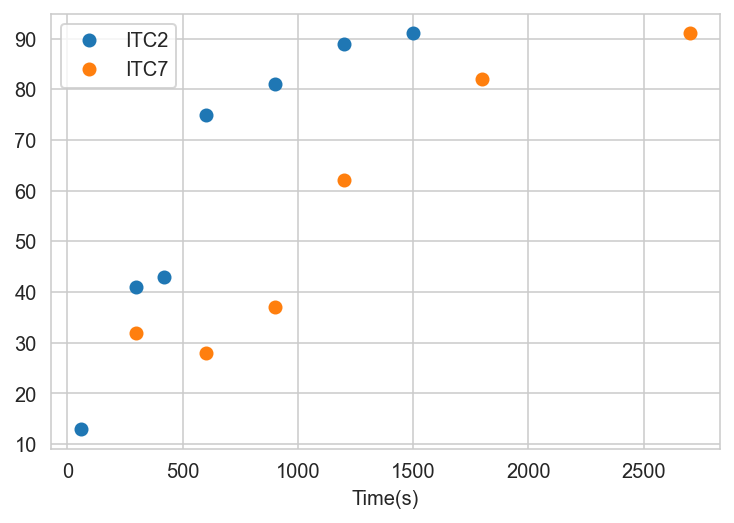

In [64]:
df.plot(marker='o', lw=0);

Note that the data of the two columns are plotted against the time axis (the index)
and the two columns are automatically labeled in the legend. Also the x-axis has
been labeled with the name associated with the index column. 

Note that we're still missing the y-label, so let's add it: 

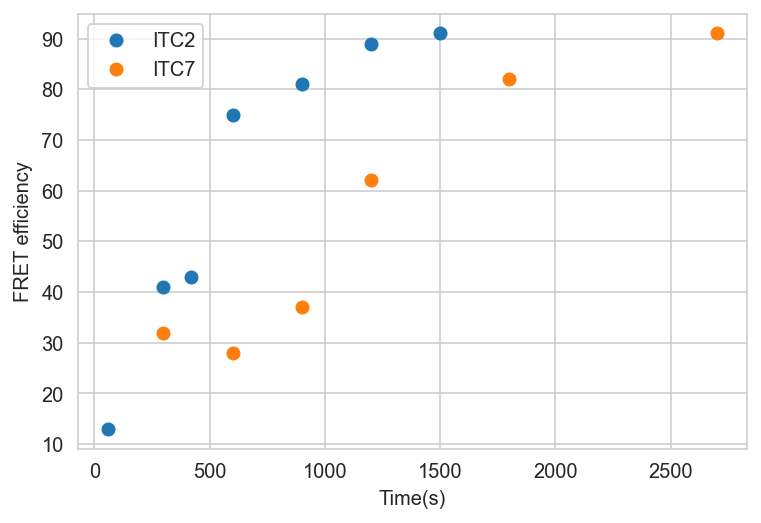

In [65]:
ylabel = 'FRET efficiency'

ax = df.plot(marker='o', lw=0)
ax.set_ylabel(f'{ylabel}');

---
## Problem  9

- define the model and name it `increasing_exp`
    > HINT: write a function for an increasing exponential decay 
- Use the `lmfit`library to fit the data
    - name the model `kinetics_model`
- set model parameters for `amplitude` 
    - set the minimum to zero
- set model parameters for `tau`
    - set an initial value of 100
    - set the minimum to zero
- print the initial parameters
---

Finally we fit the model to the ITC2 data and print the fit results. In order to specify a column in the DataFrame you can use the following syntax:

`df.ITC2` or `df.index` etc. 

Here we specify a method of fitting, i.e. `method=nelder`
and we pass `nan_policy='omit'` to deal with NaN elements.

In [70]:
results_itc2 = kinetics_model.fit(df.ITC2, x=df.index, method='nelder', nan_policy='omit') 
results_itc2

Now plot your results for the ITC2 fit:

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude     100.2        0      inf     None     True     None     None
tau           560.5        0      inf     None     True     None     None


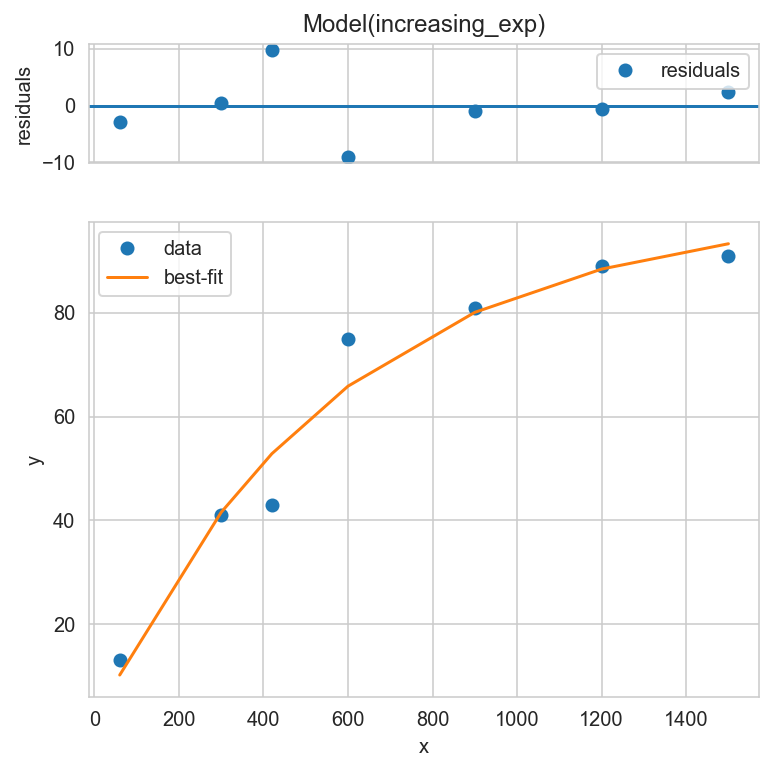

In [71]:
results_itc2.params.pretty_print()
fig2 = results_itc2.plot()

---
## Problem 10
- fit the model to the ITC7 data and print the fit results
- plot your results for the ITC7 fit 

---

## Fit comparison

As a last step we create a single plot which shows the two datasets and
the fitted curves.

First, we need to define an array for the time axis called `t`,

In [74]:
t = np.arange(0, 3000)

We can then save the fiting results from the two data sets 
into a dictionary using the following syntax,

In [75]:
# create dictionary of parameters using the syntax: 'keys', values
results_itc2.params.valuesdict()  

OrderedDict([('tau', 560.4829564943957), ('amplitude', 100.19607850202087)])

Now, we create our y data,

In [76]:
y2 = increasing_exp(t, **results_itc2.params.valuesdict())
y2

array([ 0.        ,  0.17860801,  0.35689764, ..., 99.71898612,
       99.71983658, 99.72068552])

The `**` is a special syntax for unpacking a dictionary.

---

## Problem 11

- create the y data for the ITC7 data set and name it `y7`
- use `matplotlib` to make a plot with both data sets and both fits
    - be sure to include a title, axes labels, and a legend
- print the values for $\tau$ using the general synthax
    `tau = results.params['tau'].value`
    
---